In [1]:
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import concurrent.futures

In [2]:
root_dir = Path('tele_datasets\Changing')

output_dir = Path(r'tele_datasets\mixed\train\images')
txt_dir = Path(r'tele_datasets\mixed\train\labels')

noise_radius_mean = 10
# for i in root_dir.iterdir():
#     print(i)

In [3]:
thetas = list(root_dir.iterdir())
theta_len = len(thetas)

def get_image(image_name):
    output_image = np.zeros((1024, 1024), dtype=np.int64)
    
    for index, i in enumerate(thetas):
        image_dir = i / 'images'
        image_lst = list(image_dir.iterdir())
        image_path = np.random.choice(image_lst)
        txt_path = image_path.parent.parent / 'labels' / f'{image_path.stem}.txt'
        output_txt_path = txt_dir / f'{image_name}.txt'
        if output_txt_path.exists() and index == 0:
            # print('Removing:', output_txt_path)
            output_txt_path.unlink()
        # Read the txt file and merge it to a large txt file
        with open(txt_path, 'r') as file:
            txt_content = file.read()
            with open(output_txt_path.as_posix(), 'a') as large_file:
                large_file.write(txt_content)
        
        image_arr = cv2.imread(image_path.as_posix(), cv2.IMREAD_GRAYSCALE)
        image_arr = image_arr.astype(np.int64)
        output_image += image_arr

    output_image[output_image < 10] = 10
    noise_radius = np.random.randint(noise_radius_mean / 2, noise_radius_mean * 3 / 2)
    noise1 = np.random.normal(loc=0, scale=noise_radius, size=(1024, 1024))
    noise2 = np.random.normal(loc=0, scale=noise_radius, size=(512, 512))
    # noise3 = np.random.normal(loc=0, scale=noise_radius, size=(256, 256))
    noise2 = cv2.resize(noise2, (1024, 1024))
    # noise3 = cv2.resize(noise3, (1024, 1024))
    noisy_img = output_image + noise1 + noise2
    noisy_img = np.where(noisy_img > 255, 255, noisy_img)
    noisy_img = np.where(noisy_img < 0, 0, noisy_img)
    noisy_img = noisy_img.astype(np.uint8)
    img_path = (output_dir / f'{image_name}.png').as_posix()
    # print(img_path)
    cv2.imwrite(img_path, noisy_img)


In [4]:
num_image = 800
for j in range(num_image):
    get_image(j)
with concurrent.futures.ProcessPoolExecutor(10) as executor:
    executor.map(get_image, range(num_image))

In [3]:
output_dir = Path(r'tele_datasets\mixed\validation\images')
txt_dir = Path(r'tele_datasets\mixed\validation\labels')

In [4]:
thetas = list(root_dir.iterdir())
theta_len = len(thetas)

def get_image(image_name):
    output_image = np.zeros((1024, 1024), dtype=np.uint8)
    
    for index, i in enumerate(thetas):
        image_dir = i / 'images'
        image_lst = list(image_dir.iterdir())
        image_path = np.random.choice(image_lst)
        txt_path = image_path.parent.parent / 'labels' / f'{image_path.stem}.txt'
        output_txt_path = txt_dir / f'{image_name}.txt'
        if output_txt_path.exists() and index == 0:
            # print('Removing:', output_txt_path)
            output_txt_path.unlink()
        # Read the txt file and merge it to a large txt file
        with open(txt_path, 'r') as file:
            txt_content = file.read()
            with open(output_txt_path.as_posix(), 'a') as large_file:
                large_file.write(txt_content)
        
        image_arr = cv2.imread(image_path.as_posix(), cv2.IMREAD_GRAYSCALE)
        output_image += image_arr

    output_image = output_image.astype(np.int64)
    noise_radius = np.random.randint(noise_radius_mean / 2, noise_radius_mean * 3 / 2)
    noise1 = np.random.normal(loc=0, scale=noise_radius, size=(1024, 1024))
    noise2 = np.random.normal(loc=0, scale=noise_radius / 4, size=(512, 512))
    noise2 = cv2.resize(noise2, (1024, 1024))
    noisy_img = output_image + noise1 + noise2
    noisy_img = np.where(noisy_img > 255, 255, noisy_img)
    noisy_img = np.where(noisy_img < 0, 0, noisy_img)
    noisy_img = noisy_img.astype(np.uint8)
    img_path = (output_dir / f'{image_name}.png').as_posix()
    # print(img_path)
    cv2.imwrite(img_path, noisy_img)


In [5]:
num_image = 200
for j in range(num_image):
    get_image(j)
with concurrent.futures.ProcessPoolExecutor(10) as executor:
    executor.map(get_image, range(num_image))

In [8]:
import utils

In [9]:
data_dir = Path(r'tele_datasets\mixed')
curr_dir = Path.cwd()

[[0.5771484375, 0.6328125, 0.04079506551737252, 0.04079506551737252], [0.21875, 0.1279296875, 0.03398395751558683, 0.03398395751558683], [0.20166015625, 0.91748046875, 0.02792427246769676, 0.02792427246769676], [0.26318359375, 0.84619140625, 0.016612540974252212, 0.016612540974252212], [0.43408203125, 0.60302734375, 0.022265157740312427, 0.022265157740312427], [0.27783203125, 0.52587890625, 0.012872249188804802, 0.012872249188804802], [0.79345703125, 0.71923828125, 0.010050732783473517, 0.010050732783473517], [0.56689453125, 0.54736328125, 0.009548294164151781, 0.009548294164151781], [0.33447265625, 0.44775390625, 0.025171257238163793, 0.025171257238163793], [0.49951171875, 0.62939453125, 0.024952831817454897, 0.024952831817454897], [0.19775390625, 0.61181640625, 0.006833334225790056, 0.006833334225790056], [0.6171875, 0.23828125, 0.011835452147396735, 0.011835452147396735], [0.7041015625, 0.115234375, 0.01779880789168932, 0.01779880789168932], [0.1513671875, 0.76953125, 0.011942572489

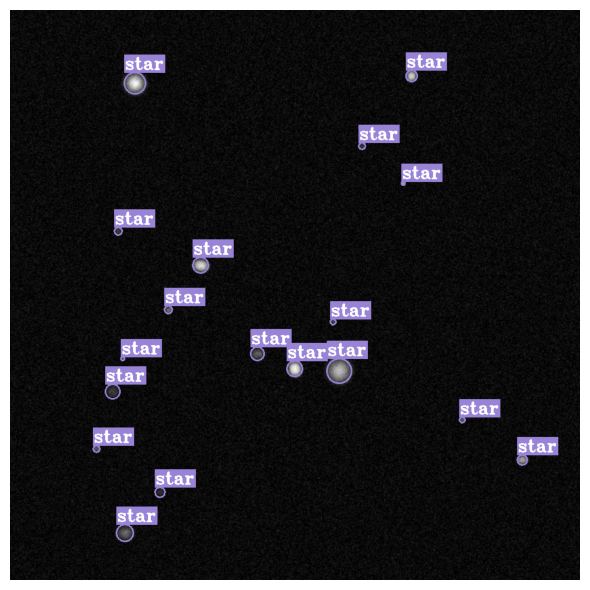

In [10]:
utils.labels_plot(
    image_paths=f'{data_dir}/train/images/*',
    label_paths=f'{data_dir}/train/labels/*',
    num_samples=1, SHOW=False, SAVE=True, save_dir=curr_dir, conf=False
)